<h2 style= "font-size:3rem;color:orange"> Creating Impulse resonses using a Feedback Delay Network</h2>


Algorithmic reverb using a 4x4 FDN

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
from random import random

Creating impuls to visualize impulse response of the algorithm

In [128]:
sr = 44100
x = np.zeros(sr) 
x[0] = 1


Initiazing matrix, delays and buffers

In [199]:
g = [[0,1,1,0],
     [-1,0,0,-1], 
     [1,0,0,-1], 
     [0,1,-1,0]]

delays = [1571, 2053, 2719, 3463];

buffers = [np.zeros(delays[0]), np.zeros(delays[1]), np.zeros(delays[2]), np.zeros(delays[3])]
feedbacks = [0,0,0,0]
delay_inputs = [0,0,0,0]
delay_outputs = [0,0,0,0]

number_of_IRs = 100
y = np.zeros((len(x), number_of_IRs))
feedback_matrix = np.zeros((number_of_IRs, 4 , 4))
print(np.shape(y))


(44100, 100)


Delay line

In [81]:
def DelayLine(x, buffer, n, delay_length_samples, max_delay_length):    
    idxR = (n - delay_length_samples) %  max_delay_length # Read index
    y = buffer[idxR]
    idxW = n % max_delay_length # write index
    buffer[idxW] = x
    
    return y, buffer

Going through sample by sample

In [200]:
for r in range(0, number_of_IRs):
    for i in range(0, 4):
        for l in range(0, 4):
            g[i][l] = (random() * 2 - 1)
    feedback_matrix[r] = g
    buffers = [np.zeros(delays[0]), np.zeros(delays[1]), np.zeros(delays[2]), np.zeros(delays[3])]
    feedbacks = [0,0,0,0]
    delay_inputs = [0,0,0,0]
    delay_outputs = [0,0,0,0]
    
    for n in range(0,len(x)):
        for i in range(0,4):
            delay_inputs[i] = x[n] + feedbacks[i]
            delay_outputs[i] , buffers[i] = DelayLine(delay_inputs[i], buffers[i], n,  delays[i], delays[i])

        for i in range(0,4):
            y[n][r] += delay_outputs[i]
            feedbacks[i] = 0.6 * (g[0][i] * delay_outputs[0]+ g[1][i] * delay_outputs[1] + g[2][i] * delay_outputs[2] + g[3][i] * delay_outputs[3])
            

Plot impulse response

(44100, 100)


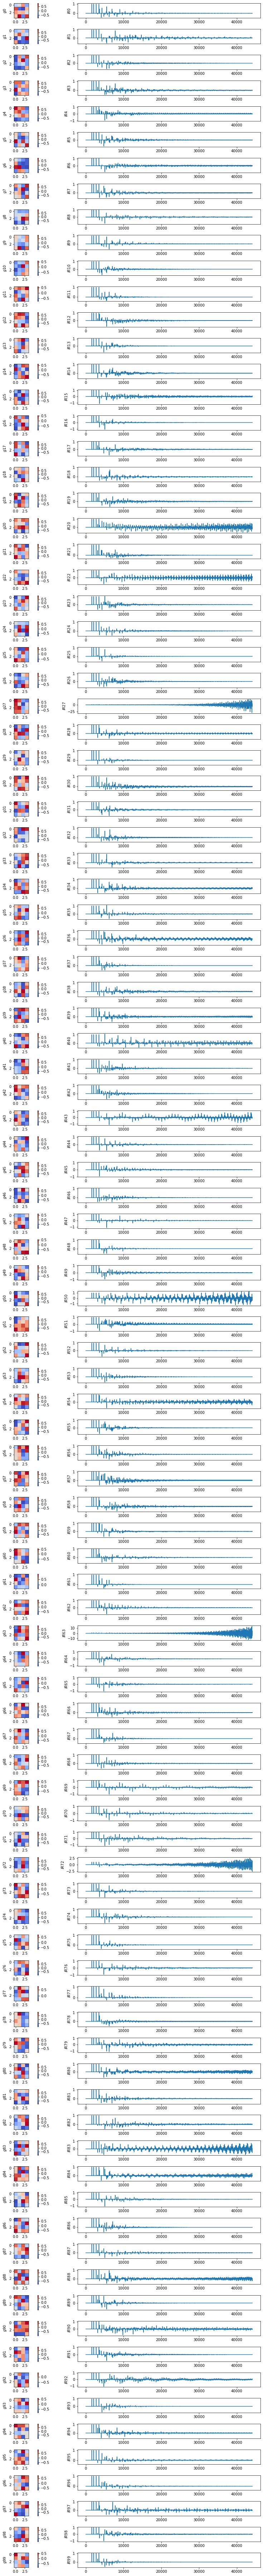

In [201]:
t = np.arange(0,sr)

IR = y.T
print(np.shape(y))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(100)
plt.tight_layout()

idx = 1
for r in range(0, number_of_IRs):
    
    plt.subplot(number_of_IRs,2 , idx)
    
    idx+=1
    im = plt.imshow(feedback_matrix[r], cmap="coolwarm")
    plt.ylabel(f'$g {r}$')
    plt.colorbar(im)
    
    plt.subplot(number_of_IRs,2 , idx)
    plt.plot(t, IR[r])
    idx+=1
    plt.ylabel(f'$IR {r}$')

In [209]:
# save data to file

#merging everything into a single data structure
ImpulseResponseData = pd.DataFrame(IR)
ImpulseResponseData.to_csv('.csv'))

#FeedbackMatrixData =  pd.DataFrame(data=feedback_matrix, columns=pd.MultiIndex.from_tuples(zip(A,B)))
for i in range(number_of_IRs):
    dataset = pd.DataFrame(feedback_matrix[i])
    
    root = 'FeedbackMatrices'
    
    filename = f'feedback_matrix{i}.csv'
    
    dataset.to_csv(root + '/' + filename)
    
    
    

    #FeedbackMatrixData = pd.MultiIndex.from_arrays(feedback_matrix, names=('number', 'color'))
    
#dataset['filename'] = filenames
#we can save the dataset to a file to resume working without re-computing the features (unless you want to change them)
#dataset.to_csv('IRs.csv')
#dataset

feedback_matrix0.csv
feedback_matrix1.csv
feedback_matrix2.csv
feedback_matrix3.csv
feedback_matrix4.csv
feedback_matrix5.csv
feedback_matrix6.csv
feedback_matrix7.csv
feedback_matrix8.csv
feedback_matrix9.csv
feedback_matrix10.csv
feedback_matrix11.csv
feedback_matrix12.csv
feedback_matrix13.csv
feedback_matrix14.csv
feedback_matrix15.csv
feedback_matrix16.csv
feedback_matrix17.csv
feedback_matrix18.csv
feedback_matrix19.csv
feedback_matrix20.csv
feedback_matrix21.csv
feedback_matrix22.csv
feedback_matrix23.csv
feedback_matrix24.csv
feedback_matrix25.csv
feedback_matrix26.csv
feedback_matrix27.csv
feedback_matrix28.csv
feedback_matrix29.csv
feedback_matrix30.csv
feedback_matrix31.csv
feedback_matrix32.csv
feedback_matrix33.csv
feedback_matrix34.csv
feedback_matrix35.csv
feedback_matrix36.csv
feedback_matrix37.csv
feedback_matrix38.csv
feedback_matrix39.csv
feedback_matrix40.csv
feedback_matrix41.csv
feedback_matrix42.csv
feedback_matrix43.csv
feedback_matrix44.csv
feedback_matrix45.cs